# Dimensionality Reduction with PCA and LDA Using Sklearn

# Principal Component Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# importing the dataset

iris_df = sns.load_dataset("iris")

#printing the dataset header

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Creating the feature set
X = iris_df.drop(["species"],axis=1)

# Creating label set

y = iris_df["species"]

# converting labels to numbers

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [6]:
# dividing data into 80% - 20% training and test sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [7]:
#applying scaling on training and test data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
#importing PCA class

from sklearn.decomposition import PCA

#Creating an object of the PCA class
pca = PCA()

#Training PCA model on training data

X_train = pca.fit_transform(X_train)

#making predictions on the test data

X_test = pca.transform(X_test)

In [9]:
#Printing the variance ratios

variance_ratios = pca.explained_variance_ratio_
print(variance_ratios)

[0.72229951 0.2397406  0.03335483 0.00460506]


In [11]:
# Selecting two principal components 

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [13]:
#making predictions using logistic regression 
from sklearn.linear_model import LogisticRegression

#training the logistic regression model

lg = LogisticRegression()

lg.fit(X_train,y_train)

#Predicting the Test set results

y_pred = lg.predict(X_test)


#evaluation results 


from sklearn.metrics import accuracy_score


print(accuracy_score(y_test,y_pred))

0.8666666666666667


In [14]:
# With just 2 features the accuracy for correctly predicting the label for the iris plant is 86.66%

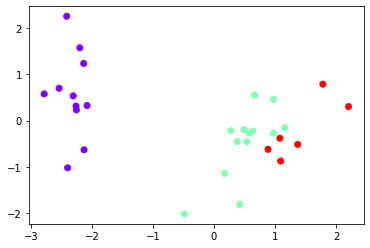

In [15]:
#plotting the dataset

from matplotlib import pyplot as plt

%matplotlib inline

#plotting the actual datapoints

plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap="rainbow")

# Linear Discriminant Analysis

In [16]:
# importing the dataset
banknote_df = pd.read_csv("BankNote_Authentication.csv")

#Displaying the first 5 rows 

banknote_df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [17]:
#dividing data into features and labels

X = banknote_df.drop(["class"],axis=1)
y = banknote_df.filter(["class"],axis=1)

In [18]:
# dividing data into 80% - 20% training and test sets

from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [19]:
#Applying scaling on training and test data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
# importing LDA class

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#creating object of the LDA class
lda = LDA()

#training PCA model on training data

X_train = lda.fit_transform(X_train,y_train)

#making predictions on test data
X_test = lda.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [21]:
#printing variance ratios 

varianc_ratios = lda.explained_variance_ratio_
print(variance_ratios)

[0.72229951 0.2397406  0.03335483 0.00460506]


In [22]:
#Creating object of the LDA class

lda = LDA(n_components=1)

#Training PCA model on training data

X_train = lda.fit_transform(X_train,y_train)

#making predictions on test data

X_test = lda.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [23]:
#making predictions using logistic regression 
from sklearn.linear_model import LogisticRegression

#training the logistic regression model

lg = LogisticRegression()

lg.fit(X_train,y_train)

#Predicting the Test set results

y_pred = lg.predict(X_test)


#evaluation results 


from sklearn.metrics import accuracy_score


print(accuracy_score(y_test,y_pred))


0.9890909090909091


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
# This shows that even with a single feature the model is able to predict whether or not a banknote is fake with 98.90% 
# accuracy